In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = (20,10)


In [2]:
df = pd.read_excel("smoke.xlsx")
df = df[['Sensor Value']]
df

,Sensor Value
0,161
1,160
2,157
3,153
4,149
...,...
1123,355
1124,354
1125,353
1126,352


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1128 entries, 0 to 1127
Data columns (total 1 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   Sensor Value  1128 non-null   int64
dtypes: int64(1)
memory usage: 8.9 KB


In [4]:
Days = pd.date_range(start="2017-09-07",end="2020-06-25")
Days

DatetimeIndex(['2017-09-07', '2017-09-08', '2017-09-09', '2017-09-10',
               '2017-09-11', '2017-09-12', '2017-09-13', '2017-09-14',
               '2017-09-15', '2017-09-16',
               ...
               '2020-06-16', '2020-06-17', '2020-06-18', '2020-06-19',
               '2020-06-20', '2020-06-21', '2020-06-22', '2020-06-23',
               '2020-06-24', '2020-06-25'],
              dtype='datetime64[ns]', length=1023, freq='D')

In [5]:
dataframe = pd.DataFrame()
dataframe['ds'] = Days
dataframe['ds'] = dataframe['ds'].dt.date
dataframe['y'] = df[['Sensor Value']]
dataframe


,ds,y
0,2017-09-07,161
1,2017-09-08,160
2,2017-09-09,157
3,2017-09-10,153
4,2017-09-11,149
...,...,...
1018,2020-06-21,376
1019,2020-06-22,376
1020,2020-06-23,375
1021,2020-06-24,375


In [6]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1023 entries, 0 to 1022
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ds      1023 non-null   object
 1   y       1023 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 16.1+ KB


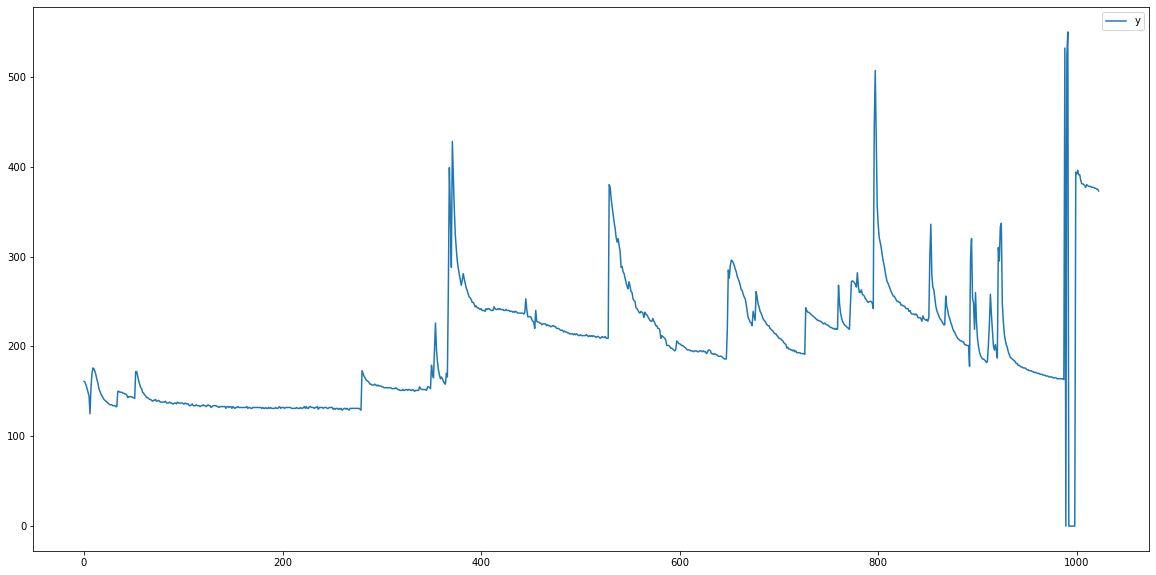

In [7]:
dataframe.plot()

In [8]:
from statsmodels.tsa.stattools import adfuller
def addfuller_test(data):
    result = adfuller(data)
    labels = ['ADF Test Statistic','p-value','# Lags Used','# Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value))
    if(result[1]<= 0.05):
        print("Data is stationary")
    else:
        print("Data is non stationary")

In [9]:
addfuller_test(dataframe['y'])

ADF Test Statistic : -9.16963730515385
p-value : 2.407777229625014e-15
# Lags Used : 0
# Observations Used : 1022
Data is stationary


In [10]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf 


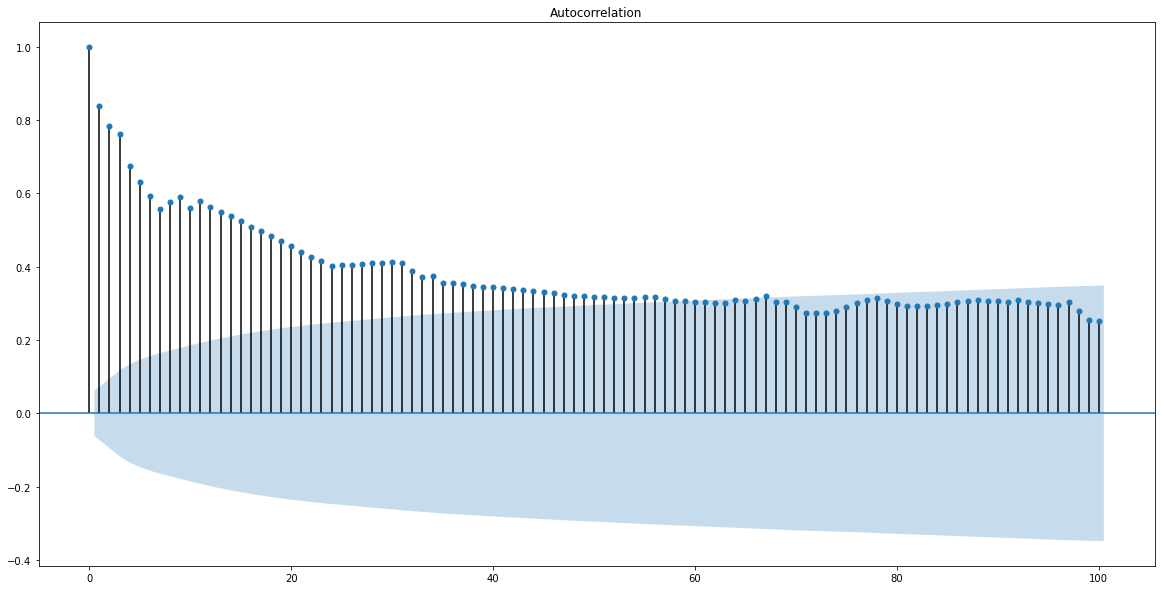

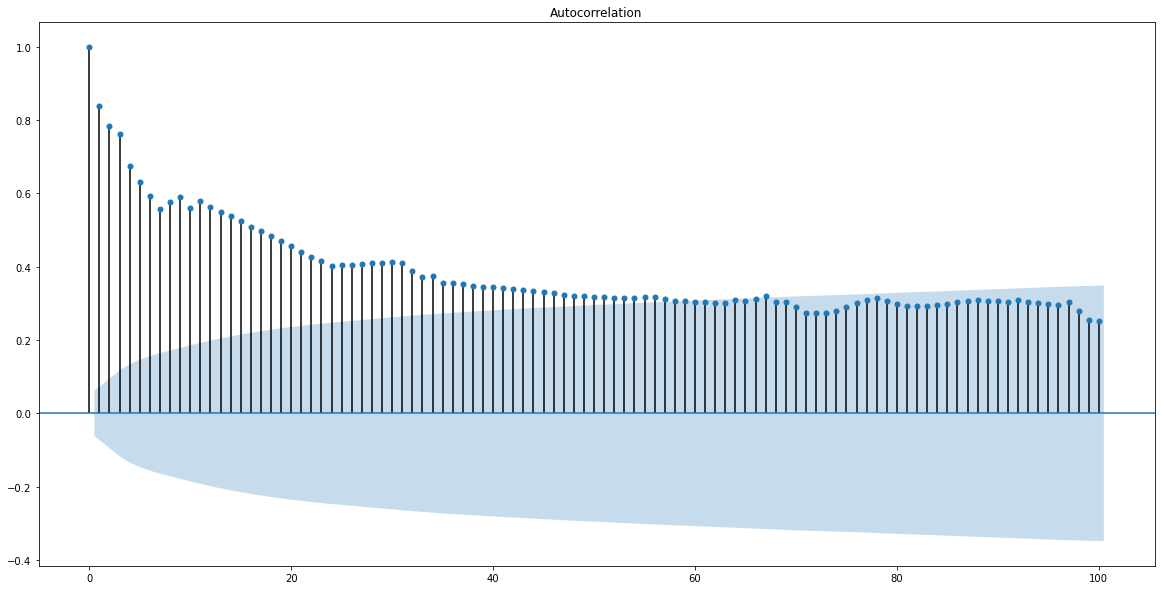

In [11]:
plot_acf(dataframe['y'],lags=100)

In [12]:
# p = 60

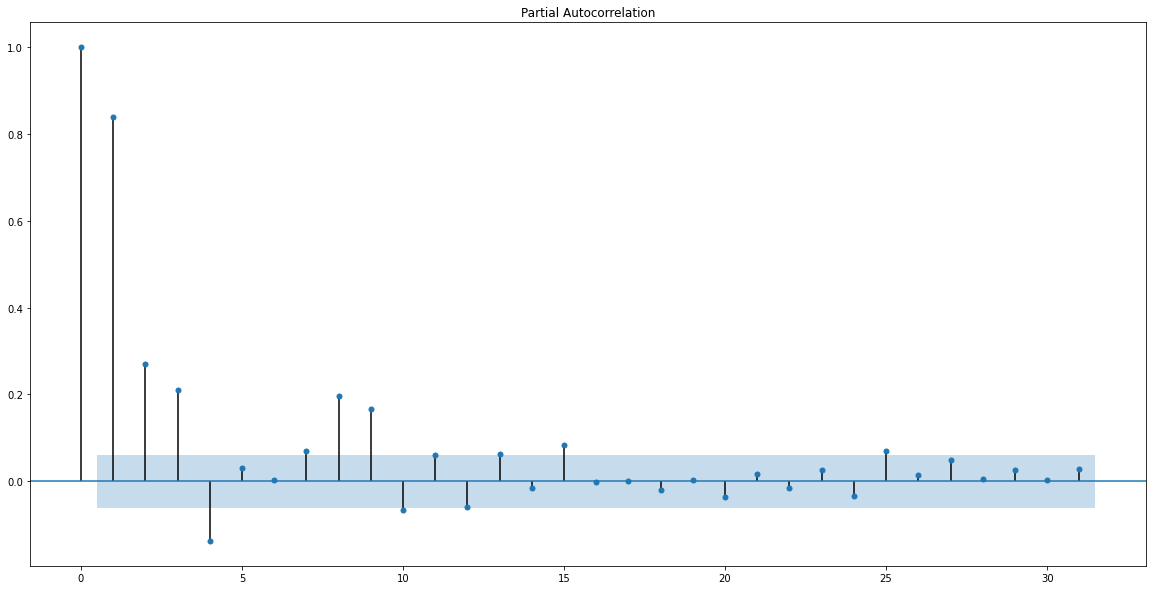

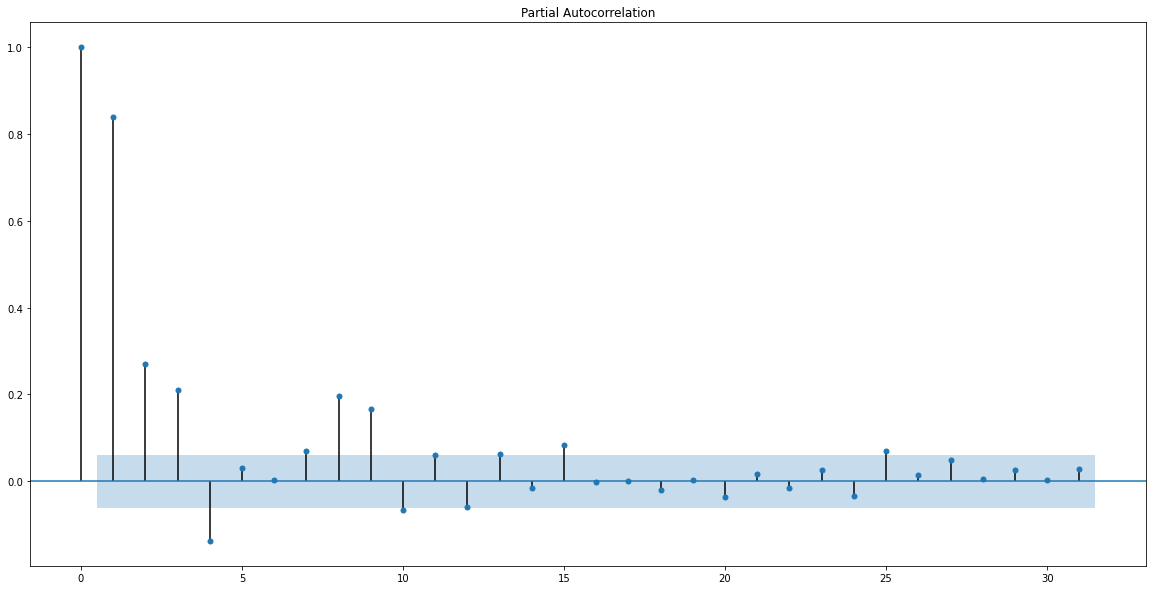

In [13]:
plot_pacf (dataframe['y'])

In [14]:
# q = 9 or 10

In [15]:
import statsmodels.api as sm 


In [16]:
X = dataframe['y'].values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]

model = sm.tsa.statespace.SARIMAX(history,order=(60,0,10),seasonal_order=(0,0,0,0))




In [17]:
model_fit = model.fit()

C:\Users\S.M.Ammar\AppData\Local\Programs\Python\Python37\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\S.M.Ammar\AppData\Local\Programs\Python\Python37\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


In [18]:
from math import sqrt
from sklearn.metrics import mean_squared_error

In [19]:
len(test)

348

In [20]:
preds = model_fit.forecast(steps=len(test))

In [21]:
# preds = preds[0]
preds = preds.tolist()
preds

[239.59900132281473,
 236.82722202182785,
 238.36141443303154,
 241.0245073795479,
 239.75504537975587,
 238.57948187035913,
 237.34056147990495,
 236.5926599310564,
 235.53042526688134,
 233.9135582314123,
 234.20343166028323,
 232.9362018724593,
 232.59968012655224,
 233.1679560386528,
 233.7396304665334,
 232.0024992095748,
 232.54200155770548,
 234.2587463649918,
 235.2745684078356,
 235.25294873865437,
 235.19454983830354,
 234.48635766368432,
 234.18072013122912,
 232.82694942891032,
 233.05489149881313,
 232.7066185968867,
 232.43386319809903,
 233.12093909054374,
 233.7437034557916,
 233.69668769115867,
 233.85216121820264,
 234.57718017992698,
 234.87163362390487,
 236.10016501676643,
 236.40368200391137,
 235.9928023410348,
 236.1611025628209,
 236.3202218543296,
 235.8299960576192,
 235.57088038751272,
 235.38105677349066,
 235.4956796134457,
 235.52097667766412,
 235.62588584193537,
 235.6806723600729,
 235.35243031346977,
 234.9377636845328,
 234.98983613264627,
 234.79847

In [22]:
test = test.tolist()
test

[234,
 229,
 261,
 255,
 247,
 244,
 239,
 237,
 234,
 231,
 229,
 228,
 226,
 224,
 223,
 223,
 220,
 219,
 218,
 217,
 215,
 214,
 214,
 212,
 211,
 209,
 209,
 208,
 207,
 206,
 204,
 203,
 202,
 198,
 199,
 197,
 197,
 196,
 196,
 195,
 196,
 194,
 195,
 193,
 193,
 193,
 193,
 192,
 192,
 192,
 192,
 191,
 243,
 240,
 238,
 238,
 237,
 236,
 235,
 234,
 233,
 232,
 231,
 230,
 229,
 229,
 228,
 228,
 227,
 226,
 225,
 226,
 225,
 224,
 224,
 223,
 222,
 221,
 221,
 220,
 220,
 219,
 220,
 219,
 219,
 268,
 248,
 238,
 232,
 228,
 226,
 224,
 223,
 222,
 221,
 220,
 219,
 245,
 272,
 273,
 272,
 271,
 269,
 266,
 282,
 267,
 260,
 260,
 263,
 258,
 257,
 256,
 253,
 252,
 250,
 249,
 250,
 250,
 250,
 248,
 242,
 444,
 507,
 428,
 356,
 335,
 321,
 316,
 310,
 302,
 295,
 290,
 283,
 277,
 272,
 270,
 267,
 264,
 261,
 259,
 256,
 256,
 254,
 252,
 250,
 250,
 249,
 249,
 246,
 246,
 245,
 245,
 244,
 242,
 242,
 242,
 239,
 240,
 237,
 236,
 236,
 236,
 235,
 236,
 235,
 232,
 232

In [23]:
mean_squared_error(test,preds)

5547.099337599673